In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('used-car-quality-detection')
jovian.set_colab_id('1bBjypnVr93XaJPe7W1DZxnGo6PFpDm_R')

# Used-Car-Quality-Detection

One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community calls these unfortunate purchases "kicks".

Kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle.

Modelers who can figure out which cars have a higher risk of being kick can provide real value to dealerships trying to provide the best inventory selection possible to their customers.

This project's objective is to predict if the car purchased at the Auction is a Kick (bad buy).

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="used-car-quality-detection")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...


[jovian] Error: Looks like the notebook is missing output cells, please save the notebook and try jovian.commit again.


Committed successfully! https://jovian.ai/prashantbharti19/used-car-quality-detection


'https://jovian.ai/prashantbharti19/used-car-quality-detection'

In [5]:
!pip install kaggle pandas numpy  matplotlib seaborn plotly opendatasets --upgrade

In [6]:
! pip install ipython[all] 

# Download Dataset

In [7]:
import opendatasets as od
od.download('https://www.kaggle.com/c/DontGetKicked')

Skipping, found downloaded files in "./DontGetKicked" (use force=True to force download)


In [8]:
import os
os.listdir('./DontGetKicked')


['training.csv',
 'test.csv',
 'test.zip',
 'Carvana_Data_Dictionary.txt',
 'training.zip',
 'example_entry.csv']

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [10]:
train_df = pd.read_csv('./DontGetKicked/training.csv')
train_df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [11]:
test_df = pd.read_csv('./DontGetKicked/test.csv')
test_df.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [13]:
target_df = train_df['IsBadBuy']
target_df

0        0
1        0
2        0
3        0
4        0
        ..
72978    1
72979    0
72980    0
72981    0
72982    0
Name: IsBadBuy, Length: 72983, dtype: int64

In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48707 entries, 0 to 48706
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              48707 non-null  int64  
 1   PurchDate                          48707 non-null  object 
 2   Auction                            48707 non-null  object 
 3   VehYear                            48707 non-null  int64  
 4   VehicleAge                         48707 non-null  int64  
 5   Make                               48707 non-null  object 
 6   Model                              48707 non-null  object 
 7   Trim                               47157 non-null  object 
 8   SubModel                           48702 non-null  object 
 9   Color                              48703 non-null  object 
 10  Transmission                       48704 non-null  object 
 11  WheelTypeID                        46519 non-null  flo

# Identify Discrete and Continuous Columns
We are going to find the target column and input column. Further finding numerical columns and categorical columns so we can explore the data and preprocess the data

In [15]:
# we can see that our target col is a categorical column containing 0(good buy) and 1(bad buy)
target_col = train_df['IsBadBuy']
target_col

0        0
1        0
2        0
3        0
4        0
        ..
72978    1
72979    0
72980    0
72981    0
72982    0
Name: IsBadBuy, Length: 72983, dtype: int64

In [16]:
# We are not including RefId and IsBadBuy columns
input_col_df = train_df.iloc[:,2:]
input_col = input_col_df.columns.tolist()
input_col

['PurchDate',
 'Auction',
 'VehYear',
 'VehicleAge',
 'Make',
 'Model',
 'Trim',
 'SubModel',
 'Color',
 'Transmission',
 'WheelTypeID',
 'WheelType',
 'VehOdo',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'PRIMEUNIT',
 'AUCGUART',
 'BYRNO',
 'VNZIP1',
 'VNST',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost']

In [17]:
inputs_df = train_df[input_col].copy()
inputs_df

,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,1.0,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,NaN,NaN,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,1.0,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,1.0,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


## Converting data to appropriate types

In [18]:
inputs_df['PurchDate'] = pd.to_datetime(inputs_df['PurchDate'] )

In [19]:
#
def classify_features(dataframe, cardinality_threshold = 5 ):
    cardinality = dataframe.nunique()
    
    low_cardinality = cardinality[cardinality < cardinality_threshold]
    low_cardinality_col = list(low_cardinality.index)
    
    object_cols = dataframe.select_dtypes(include = 'object').columns.tolist()
    
    discrete_cols = list(set(low_cardinality_col + object_cols))
    discrete_cols = sorted(discrete_cols)
   
    continuous_cols = list(set(dataframe.columns) - set(discrete_cols))
    continous_cols = sorted(continuous_cols)
    
    return cardinality, discrete_cols, continuous_cols

In [20]:
cardinality, discrete_cols, continuous_cols = classify_features(inputs_df,100)

In [21]:
cardinality

PurchDate                              517
Auction                                  3
VehYear                                 10
VehicleAge                              10
Make                                    33
Model                                 1063
Trim                                   134
SubModel                               863
Color                                   16
Transmission                             3
WheelTypeID                              4
WheelType                                3
VehOdo                               39947
Nationality                              4
Size                                    12
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice    10342
MMRAcquisitionAuctionCleanPrice      11379
MMRAcquisitionRetailAveragePrice     12725
MMRAcquisitonRetailCleanPrice        13456
MMRCurrentAuctionAveragePrice        10315
MMRCurrentAuctionCleanPrice          11265
MMRCurrentRetailAveragePrice         12493
MMRCurrentR

In [22]:
 continuous_cols 

['VehBCost',
 'VehOdo',
 'VNZIP1',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRCurrentRetailCleanPrice',
 'PurchDate',
 'MMRCurrentAuctionAveragePrice',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRCurrentRetailAveragePrice',
 'WarrantyCost']

In [23]:
discrete_cols

['AUCGUART',
 'Auction',
 'BYRNO',
 'Color',
 'IsOnlineSale',
 'Make',
 'Model',
 'Nationality',
 'PRIMEUNIT',
 'Size',
 'SubModel',
 'TopThreeAmericanName',
 'Transmission',
 'Trim',
 'VNST',
 'VehYear',
 'VehicleAge',
 'WheelType',
 'WheelTypeID']

In [24]:
continuous_cols.remove('PurchDate')
continuous_features = inputs_df[continuous_cols].copy()
continuous_features

,VehBCost,VehOdo,VNZIP1,MMRAcquisitionAuctionCleanPrice,MMRCurrentRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRAcquisitionAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRAcquisitonRetailCleanPrice,MMRAcquisitionRetailAveragePrice,MMRCurrentRetailAveragePrice,WarrantyCost
0,7100.0,89046,33619,9829.0,12409.0,7451.0,8155.0,8552.0,13600.0,11636.0,11597.0,1113
1,7600.0,93593,33619,8383.0,12791.0,7456.0,6854.0,9222.0,12572.0,10897.0,11374.0,1053
2,4900.0,73807,33619,4760.0,8702.0,4035.0,3202.0,5557.0,8457.0,6943.0,7146.0,1389
3,4100.0,65617,33619,2675.0,5518.0,1844.0,1893.0,2646.0,5690.0,4658.0,4375.0,630
4,4000.0,69367,33619,5054.0,7911.0,3247.0,3913.0,4384.0,8707.0,7723.0,6739.0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...
72978,4200.0,45234,30212,2993.0,5937.0,2190.0,1996.0,3055.0,3732.0,2656.0,4836.0,993
72979,6200.0,71759,30212,7325.0,11652.0,6785.0,6418.0,8132.0,8411.0,7431.0,10151.0,1038
72980,8200.0,88500,30212,9959.0,14402.0,8375.0,8545.0,9802.0,11256.0,9729.0,11831.0,1893
72981,7000.0,79554,30212,7604.0,11228.0,6590.0,6420.0,7684.0,8712.0,7434.0,10099.0,1974


In [25]:
discrete_features = inputs_df[discrete_cols].copy()
discrete_features

,AUCGUART,Auction,BYRNO,Color,IsOnlineSale,Make,Model,Nationality,PRIMEUNIT,Size,SubModel,TopThreeAmericanName,Transmission,Trim,VNST,VehYear,VehicleAge,WheelType,WheelTypeID
0,NaN,ADESA,21973,RED,0,MAZDA,MAZDA3,OTHER ASIAN,NaN,MEDIUM,4D SEDAN I,OTHER,AUTO,i,FL,2006,3,Alloy,1.0
1,NaN,ADESA,19638,WHITE,0,DODGE,1500 RAM PICKUP 2WD,AMERICAN,NaN,LARGE TRUCK,QUAD CAB 4.7L SLT,CHRYSLER,AUTO,ST,FL,2004,5,Alloy,1.0
2,NaN,ADESA,19638,MAROON,0,DODGE,STRATUS V6,AMERICAN,NaN,MEDIUM,4D SEDAN SXT FFV,CHRYSLER,AUTO,SXT,FL,2005,4,Covers,2.0
3,NaN,ADESA,19638,SILVER,0,DODGE,NEON,AMERICAN,NaN,COMPACT,4D SEDAN,CHRYSLER,AUTO,SXT,FL,2004,5,Alloy,1.0
4,NaN,ADESA,19638,SILVER,0,FORD,FOCUS,AMERICAN,NaN,COMPACT,2D COUPE ZX3,FORD,MANUAL,ZX3,FL,2005,4,Covers,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,NaN,ADESA,18111,BLACK,0,MERCURY,SABLE,AMERICAN,NaN,MEDIUM,4D SEDAN GS,FORD,AUTO,GS,GA,2001,8,Alloy,1.0
72979,NaN,ADESA,18881,SILVER,0,CHEVROLET,MALIBU 4C,AMERICAN,NaN,MEDIUM,4D SEDAN LS,GM,AUTO,LS,GA,2007,2,NaN,NaN
72980,NaN,ADESA,18111,SILVER,0,JEEP,GRAND CHEROKEE 2WD V,AMERICAN,NaN,MEDIUM SUV,4D WAGON LAREDO,CHRYSLER,AUTO,Lar,GA,2005,4,Alloy,1.0
72981,NaN,ADESA,18881,WHITE,0,CHEVROLET,IMPALA,AMERICAN,NaN,LARGE,4D SEDAN LS,GM,AUTO,LS,GA,2006,3,Alloy,1.0


# Handling Missing Values

In [26]:
# Below function will give us a dataframe containing missing value count and proportion of the missing values
def missing_values(dataframe):
    count = dataframe.isna().sum().sort_values(ascending = False)
    proportion = count/dataframe.shape[0]
    
    missing_value_df = pd.concat([count, proportion], axis =1)
    missing_value_df.columns = ['Missing Values', 'Proportion']
    
    return missing_value_df

In [27]:
#missing values in continuous features
miss_val_cont = missing_values( continuous_features)
miss_val_cont

,Missing Values,Proportion
MMRCurrentRetailCleanPrice,315,0.004316
MMRCurrentAuctionAveragePrice,315,0.004316
MMRCurrentAuctionCleanPrice,315,0.004316
MMRCurrentRetailAveragePrice,315,0.004316
MMRAcquisitionAuctionCleanPrice,18,0.000247
MMRAcquisitionAuctionAveragePrice,18,0.000247
MMRAcquisitonRetailCleanPrice,18,0.000247
MMRAcquisitionRetailAveragePrice,18,0.000247
VehBCost,0,0.000000
VehOdo,0,0.000000


In [28]:
#missing values in continuous features
miss_val_discrete = missing_values(discrete_features)
miss_val_discrete

,Missing Values,Proportion
AUCGUART,69564,0.953153
PRIMEUNIT,69564,0.953153
WheelType,3174,0.043490
WheelTypeID,3169,0.043421
Trim,2360,0.032336
Transmission,9,0.000123
Color,8,0.000110
SubModel,8,0.000110
Nationality,5,0.000069
TopThreeAmericanName,5,0.000069


In [29]:
#Removing PRIMEUNIT AND AUCGUART features from discrete_cols because of 95% NAN values
discrete_feat = discrete_features[miss_val_discrete[miss_val_discrete.Proportion < 0.95].index].copy()
discrete_feat.columns

Index(['WheelType', 'WheelTypeID', 'Trim', 'Transmission', 'Color', 'SubModel',
       'Nationality', 'TopThreeAmericanName', 'Size', 'IsOnlineSale', 'Make',
       'Model', 'Auction', 'VNST', 'VehYear', 'VehicleAge', 'BYRNO'],
      dtype='object')

In [30]:
discrete_feat

,WheelType,WheelTypeID,Trim,Transmission,Color,SubModel,Nationality,TopThreeAmericanName,Size,IsOnlineSale,Make,Model,Auction,VNST,VehYear,VehicleAge,BYRNO
0,Alloy,1.0,i,AUTO,RED,4D SEDAN I,OTHER ASIAN,OTHER,MEDIUM,0,MAZDA,MAZDA3,ADESA,FL,2006,3,21973
1,Alloy,1.0,ST,AUTO,WHITE,QUAD CAB 4.7L SLT,AMERICAN,CHRYSLER,LARGE TRUCK,0,DODGE,1500 RAM PICKUP 2WD,ADESA,FL,2004,5,19638
2,Covers,2.0,SXT,AUTO,MAROON,4D SEDAN SXT FFV,AMERICAN,CHRYSLER,MEDIUM,0,DODGE,STRATUS V6,ADESA,FL,2005,4,19638
3,Alloy,1.0,SXT,AUTO,SILVER,4D SEDAN,AMERICAN,CHRYSLER,COMPACT,0,DODGE,NEON,ADESA,FL,2004,5,19638
4,Covers,2.0,ZX3,MANUAL,SILVER,2D COUPE ZX3,AMERICAN,FORD,COMPACT,0,FORD,FOCUS,ADESA,FL,2005,4,19638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,Alloy,1.0,GS,AUTO,BLACK,4D SEDAN GS,AMERICAN,FORD,MEDIUM,0,MERCURY,SABLE,ADESA,GA,2001,8,18111
72979,NaN,NaN,LS,AUTO,SILVER,4D SEDAN LS,AMERICAN,GM,MEDIUM,0,CHEVROLET,MALIBU 4C,ADESA,GA,2007,2,18881
72980,Alloy,1.0,Lar,AUTO,SILVER,4D WAGON LAREDO,AMERICAN,CHRYSLER,MEDIUM SUV,0,JEEP,GRAND CHEROKEE 2WD V,ADESA,GA,2005,4,18111
72981,Alloy,1.0,LS,AUTO,WHITE,4D SEDAN LS,AMERICAN,GM,LARGE,0,CHEVROLET,IMPALA,ADESA,GA,2006,3,18881


## Imputing missing values in discrete columns
We are imputing NaN values with Mode

In [31]:
cat_cols = inputs_df[discrete_feat.columns].copy()

#Impute the mode values in place of NaN
cat_fillna = np.squeeze(cat_cols.mode())
print(cat_fillna)
clean_cat_cols = cat_cols.fillna(cat_fillna)

WheelType                    Alloy
WheelTypeID                    1.0
Trim                           Bas
Transmission                  AUTO
Color                       SILVER
SubModel                  4D SEDAN
Nationality               AMERICAN
TopThreeAmericanName            GM
Size                        MEDIUM
IsOnlineSale                     0
Make                     CHEVROLET
Model                   PT CRUISER
Auction                    MANHEIM
VNST                            TX
VehYear                       2006
VehicleAge                       4
BYRNO                        99761
Name: 0, dtype: object


In [32]:
#checking if there is any NaN valueis left or not
clean_cat_cols.isna().sum()

WheelType               0
WheelTypeID             0
Trim                    0
Transmission            0
Color                   0
SubModel                0
Nationality             0
TopThreeAmericanName    0
Size                    0
IsOnlineSale            0
Make                    0
Model                   0
Auction                 0
VNST                    0
VehYear                 0
VehicleAge              0
BYRNO                   0
dtype: int64

## Statistical Analysis of Discrete Features
Our target column is categorical column so we need to find the relationship 
between target column and categorical columns.
1. Chi Square Test is used to find the Relationship between categorical features
2. Crammer's V test is used to find the Strength of the Relationship between categorical features

In [33]:
import scipy.stats as stats


In [34]:
def cramers_corrected_stat(confusion_matrix):
    # This test is used to find the strength of relationship categorical columns
    
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [35]:
# Chi-square and Cramer's V
chi2_results = []
''' Chi Square test is used to find if there is a relationship between two categorical columns.
    Here we want to find the relationship between our discrete features and our target column.
    Since it only show us if a relationship exist or not. It doesn't show us the strength of
    the relationship.
    So we use Crammer's V test to find the strength of the relationship.  '''
    
for col in discrete_feat:
    # contigency table
    chi2_data = pd.crosstab(discrete_feat[col], target_col)
    #display(chi2_data)

    # Chi-square test
    ''' chi2 = Chi Square value
        p = P value 
        dof = Degree of Freedoms
        expected = Expected value count
        '''
    chi2, p, dof, expected = stats.chi2_contingency(chi2_data)
    
    # Cramer's V
    V = cramers_corrected_stat(chi2_data)
    
    # Strength of Relationship
    if V >0.25: 
        s = 'Very Strong'
    elif V > 0.15 and V < 0.25 :
        s = 'Strong'
    elif V > 0.10 and V < 0.15 :
        s = 'Moderate'
    elif V > 0.05 and V < 0.10 :
        s = 'Weak'
    else :
        s = 'Very Weak'
    
    
    chi2_results.append([col, chi2, p, V, s])

columns = ['feature', 'Chi-square statistic', 'p-value',"Cramer's V", 'Strength of Relationship']
chi2_df = pd.DataFrame(chi2_results, columns=columns)
chi2_df = chi2_df.sort_values("Cramer's V", ascending=False)
chi2_df.set_index('feature', inplace=True)
chi2_df



,Chi-square statistic,p-value,Cramer's V,Strength of Relationship
feature,,,,
Model,3619.046830,2.197555e-275,0.187180,Strong
VehicleAge,2090.109319,0.000000e+00,0.168865,Strong
VehYear,1904.509890,0.000000e+00,0.161159,Strong
SubModel,2719.699387,4.265972e-191,0.159552,Strong
Trim,834.824102,4.129324e-102,0.099688,Weak
BYRNO,770.983196,4.341223e-117,0.097794,Weak
Make,466.214037,1.543437e-78,0.077134,Weak
Size,308.905415,1.162840e-59,0.063892,Weak
TopThreeAmericanName,199.840048,4.567971e-43,0.051935,Weak


## Imputing Missing Values in Continuous Features
Impute NaN values with mean of the respective column

In [36]:
#dropping date time column PurchDate
continuous_data  = continuous_features

In [37]:

fill = continuous_data.mean()
continuous_data = continuous_data.fillna(fill)
continuous_data

,VehBCost,VehOdo,VNZIP1,MMRAcquisitionAuctionCleanPrice,MMRCurrentRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRAcquisitionAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRAcquisitonRetailCleanPrice,MMRAcquisitionRetailAveragePrice,MMRCurrentRetailAveragePrice,WarrantyCost
0,7100.0,89046,33619,9829.0,12409.0,7451.0,8155.0,8552.0,13600.0,11636.0,11597.0,1113
1,7600.0,93593,33619,8383.0,12791.0,7456.0,6854.0,9222.0,12572.0,10897.0,11374.0,1053
2,4900.0,73807,33619,4760.0,8702.0,4035.0,3202.0,5557.0,8457.0,6943.0,7146.0,1389
3,4100.0,65617,33619,2675.0,5518.0,1844.0,1893.0,2646.0,5690.0,4658.0,4375.0,630
4,4000.0,69367,33619,5054.0,7911.0,3247.0,3913.0,4384.0,8707.0,7723.0,6739.0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...
72978,4200.0,45234,30212,2993.0,5937.0,2190.0,1996.0,3055.0,3732.0,2656.0,4836.0,993
72979,6200.0,71759,30212,7325.0,11652.0,6785.0,6418.0,8132.0,8411.0,7431.0,10151.0,1038
72980,8200.0,88500,30212,9959.0,14402.0,8375.0,8545.0,9802.0,11256.0,9729.0,11831.0,1893
72981,7000.0,79554,30212,7604.0,11228.0,6590.0,6420.0,7684.0,8712.0,7434.0,10099.0,1974


In [38]:
#checking if there is any NAN value is left or not
continuous_data.isna().sum()

VehBCost                             0
VehOdo                               0
VNZIP1                               0
MMRAcquisitionAuctionCleanPrice      0
MMRCurrentRetailCleanPrice           0
MMRCurrentAuctionAveragePrice        0
MMRAcquisitionAuctionAveragePrice    0
MMRCurrentAuctionCleanPrice          0
MMRAcquisitonRetailCleanPrice        0
MMRAcquisitionRetailAveragePrice     0
MMRCurrentRetailAveragePrice         0
WarrantyCost                         0
dtype: int64

In [39]:
import math
slide = 3
c = math.ceil(len(continuous_cols)/slide)

for i in range(c):
    
    cols = continuous_cols[slide * i: slide * (i+1)]
    print('\n \t')
    desc_df = continuous_features[cols].describe()
    print(desc_df)


 	
           VehBCost         VehOdo        VNZIP1
count  72983.000000   72983.000000  72983.000000
mean    6730.934326   71499.995917  58043.059945
std     1767.846435   14578.913128  26151.640415
min        1.000000    4825.000000   2764.000000
25%     5435.000000   61837.000000  32124.000000
50%     6700.000000   73361.000000  73108.000000
75%     7900.000000   82436.000000  80022.000000
max    45469.000000  115717.000000  99224.000000

 	
       MMRAcquisitionAuctionCleanPrice  ...  MMRCurrentAuctionAveragePrice
count                     72965.000000  ...                   72668.000000
mean                       7373.636031  ...                    6132.081287
std                        2722.491986  ...                    2434.567723
min                           0.000000  ...                       0.000000
25%                        5406.000000  ...                    4275.000000
50%                        7303.000000  ...                    6062.000000
75%                       

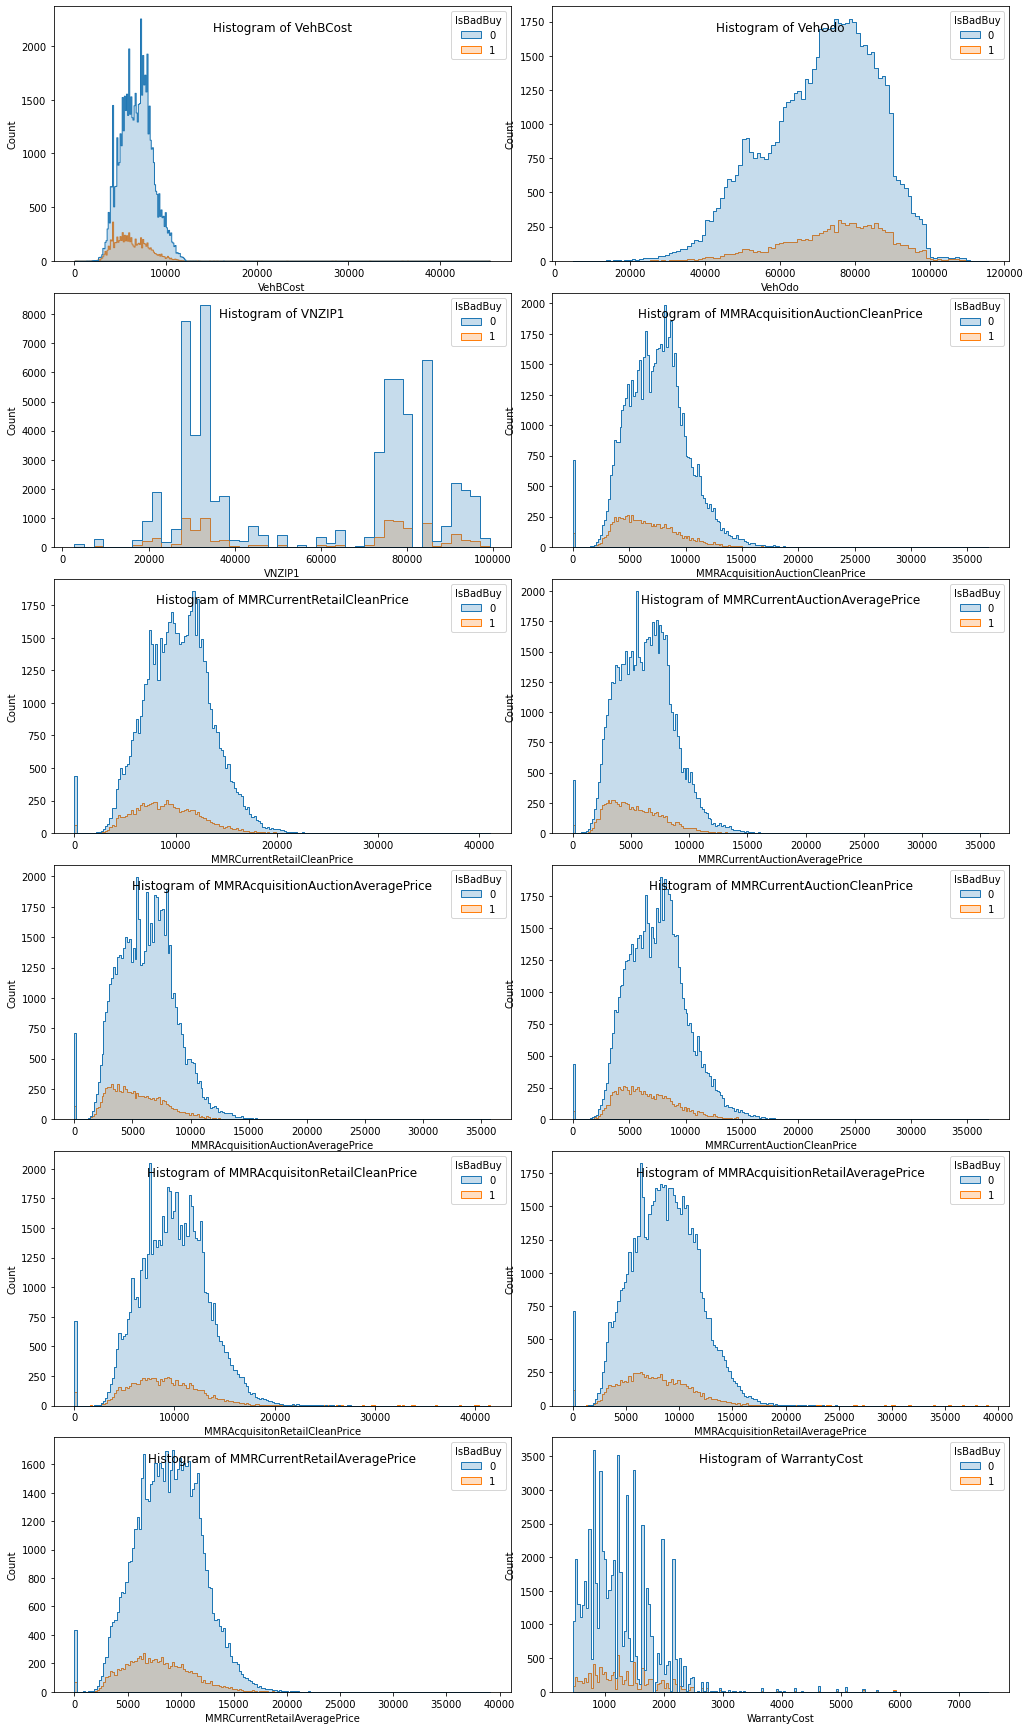

In [40]:
cols = 2
rows = math.ceil(len(continuous_cols)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(14, 8//cols*rows))
plt.tight_layout()

for i, col in enumerate(continuous_cols):
    ax = axes[i//cols, i%cols]
    sns.histplot(data=inputs_df, x=col, hue=target_col, element='step', ax=ax)
    ax.set_title(f'Histogram of {col}', y=0.88)

plt.show()

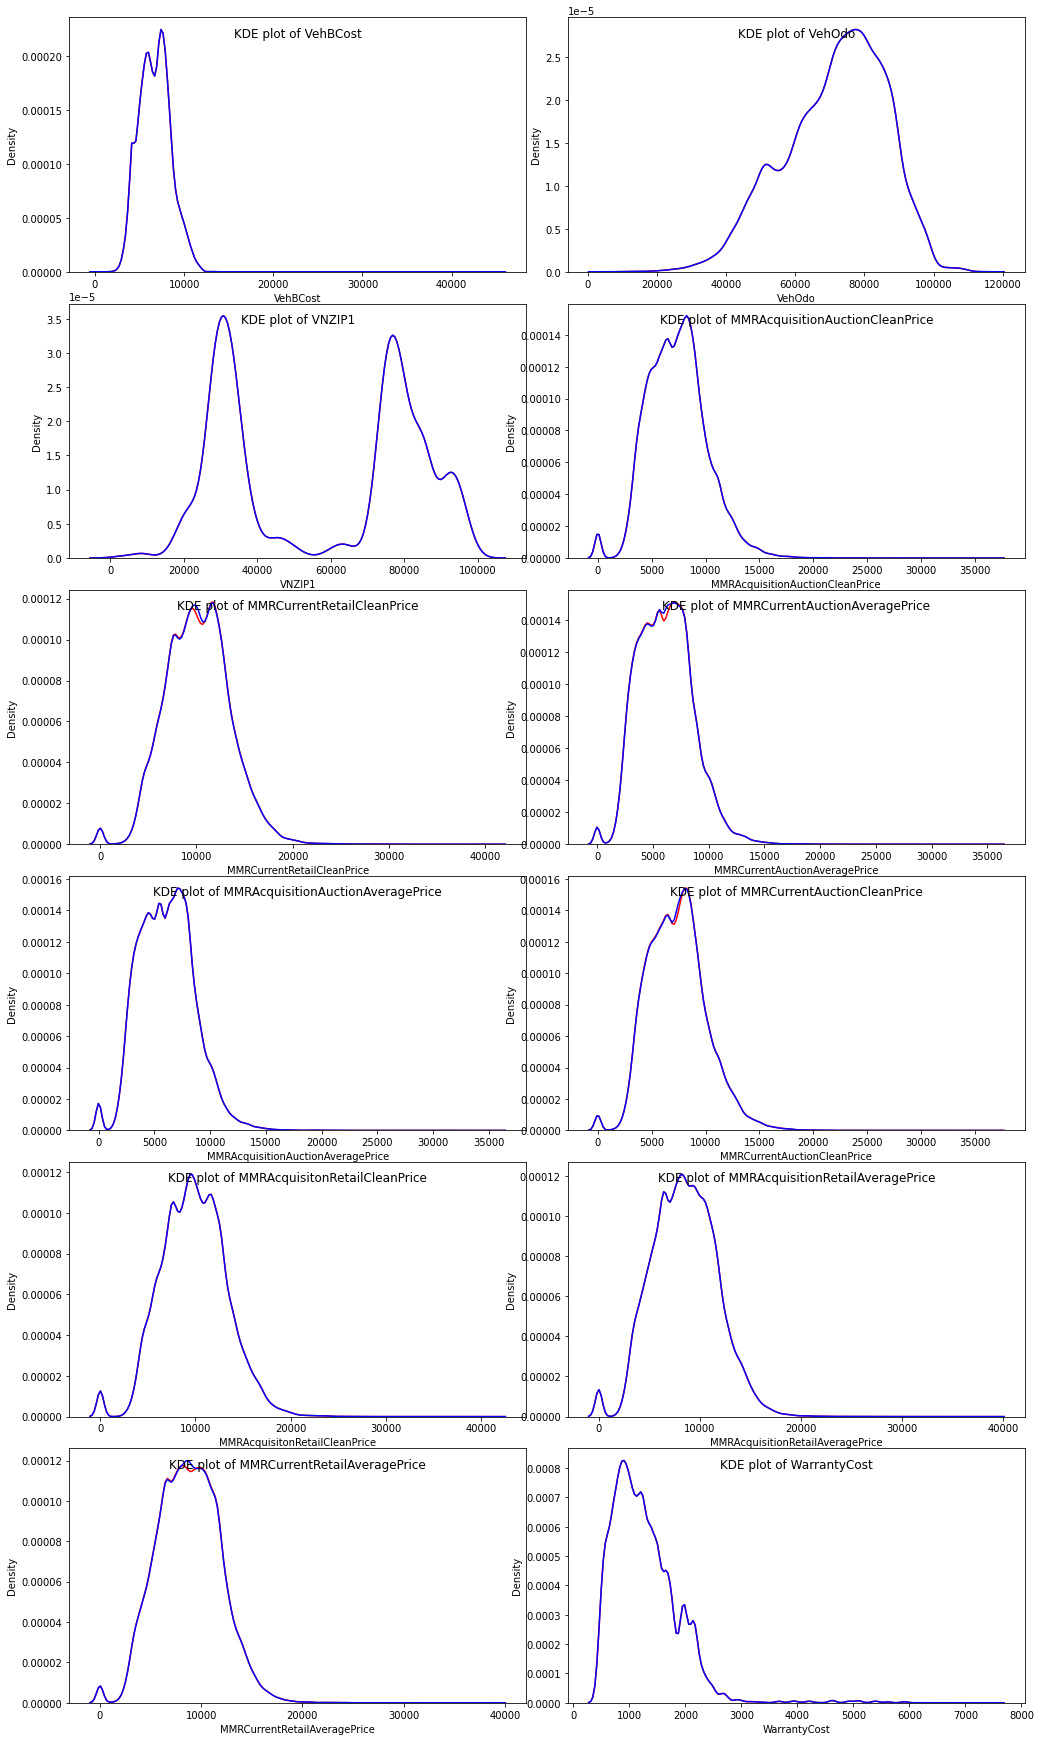

In [41]:
cols = 2
rows = math.ceil(len(continuous_cols)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(14, 8//cols*rows))
plt.tight_layout()

for i, col in enumerate(continuous_cols):
    ax = axes[i//cols, i%cols]
    sns.kdeplot(data=continuous_features, x=col, ax=ax, color = 'red')
    sns.kdeplot(data = continuous_data, x = col, ax = ax,color = 'blue')
    ax.set_title(f'KDE plot of {col}', y=0.90)

plt.show()

From charts we see that by imputing mean in place of NAN values. There is not much change is observed in the Kernel Density of the columns.

## Statistical Analysis of Continuous Features Using ANOVA

We are going to find if there is a significant relationship between continuous 
features and target column

In [42]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [43]:
new_df = continuous_data.copy()
new_df['target_col'] = target_col
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   VehBCost                           72983 non-null  float64
 1   VehOdo                             72983 non-null  int64  
 2   VNZIP1                             72983 non-null  int64  
 3   MMRAcquisitionAuctionCleanPrice    72983 non-null  float64
 4   MMRCurrentRetailCleanPrice         72983 non-null  float64
 5   MMRCurrentAuctionAveragePrice      72983 non-null  float64
 6   MMRAcquisitionAuctionAveragePrice  72983 non-null  float64
 7   MMRCurrentAuctionCleanPrice        72983 non-null  float64
 8   MMRAcquisitonRetailCleanPrice      72983 non-null  float64
 9   MMRAcquisitionRetailAveragePrice   72983 non-null  float64
 10  MMRCurrentRetailAveragePrice       72983 non-null  float64
 11  WarrantyCost                       72983 non-null  int

In [44]:
anova_results = []

for col in continuous_cols:
    groupby = new_df.groupby(target_col)[col]
    
    categories = new_df['target_col'].dropna().unique()
    
    anova_data = [
        groupby.get_group(category) for category in categories
    ]
    
    F, p = stats.f_oneway(*anova_data)
    anova_results.append([col, F, p])
alpha_f = stats.f.ppf(1-0.05,1,72981)
print("F-statistic of 95% significance level : {}". format(alpha_f))
columns = ['feature', 'F-statistic', 'p-value']
anova_df = pd.DataFrame(anova_results, columns=columns)
anova_df = anova_df.sort_values('p-value').set_index('feature')
anova_df


F-statistic of 95% significance level : 3.8415862423970393


,F-statistic,p-value
feature,,
MMRAcquisitionAuctionAveragePrice,881.509574,1.448346e-192
MMRCurrentAuctionAveragePrice,876.072303,2.132246e-191
MMRCurrentAuctionCleanPrice,795.344600,4.796009e-174
MMRCurrentRetailAveragePrice,793.700374,1.082723e-173
MMRAcquisitionAuctionCleanPrice,781.741005,4.045609e-171
MMRCurrentRetailCleanPrice,738.092643,9.994157e-162
VehBCost,735.863911,3.016610e-161
MMRAcquisitionRetailAveragePrice,561.940143,9.367432e-124
MMRAcquisitonRetailCleanPrice,514.389978,1.739455e-113


We can see that VNZIP1 is below alpha value and other features have F-statistics above alpha value. It signifies that there is a relation between continuous features(except VNZIP1) and 'IsBadBuy'.

In [45]:
# We are removing VINZIP1 column
new_df = new_df.drop(['VNZIP1', 'target_col'],axis =1)
new_df

,VehBCost,VehOdo,MMRAcquisitionAuctionCleanPrice,MMRCurrentRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRAcquisitionAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRAcquisitonRetailCleanPrice,MMRAcquisitionRetailAveragePrice,MMRCurrentRetailAveragePrice,WarrantyCost
0,7100.0,89046,9829.0,12409.0,7451.0,8155.0,8552.0,13600.0,11636.0,11597.0,1113
1,7600.0,93593,8383.0,12791.0,7456.0,6854.0,9222.0,12572.0,10897.0,11374.0,1053
2,4900.0,73807,4760.0,8702.0,4035.0,3202.0,5557.0,8457.0,6943.0,7146.0,1389
3,4100.0,65617,2675.0,5518.0,1844.0,1893.0,2646.0,5690.0,4658.0,4375.0,630
4,4000.0,69367,5054.0,7911.0,3247.0,3913.0,4384.0,8707.0,7723.0,6739.0,1020
...,...,...,...,...,...,...,...,...,...,...,...
72978,4200.0,45234,2993.0,5937.0,2190.0,1996.0,3055.0,3732.0,2656.0,4836.0,993
72979,6200.0,71759,7325.0,11652.0,6785.0,6418.0,8132.0,8411.0,7431.0,10151.0,1038
72980,8200.0,88500,9959.0,14402.0,8375.0,8545.0,9802.0,11256.0,9729.0,11831.0,1893
72981,7000.0,79554,7604.0,11228.0,6590.0,6420.0,7684.0,8712.0,7434.0,10099.0,1974


## Scaling Numerical features

In [46]:
new_col = continuous_cols.copy()
new_col.remove('VNZIP1')


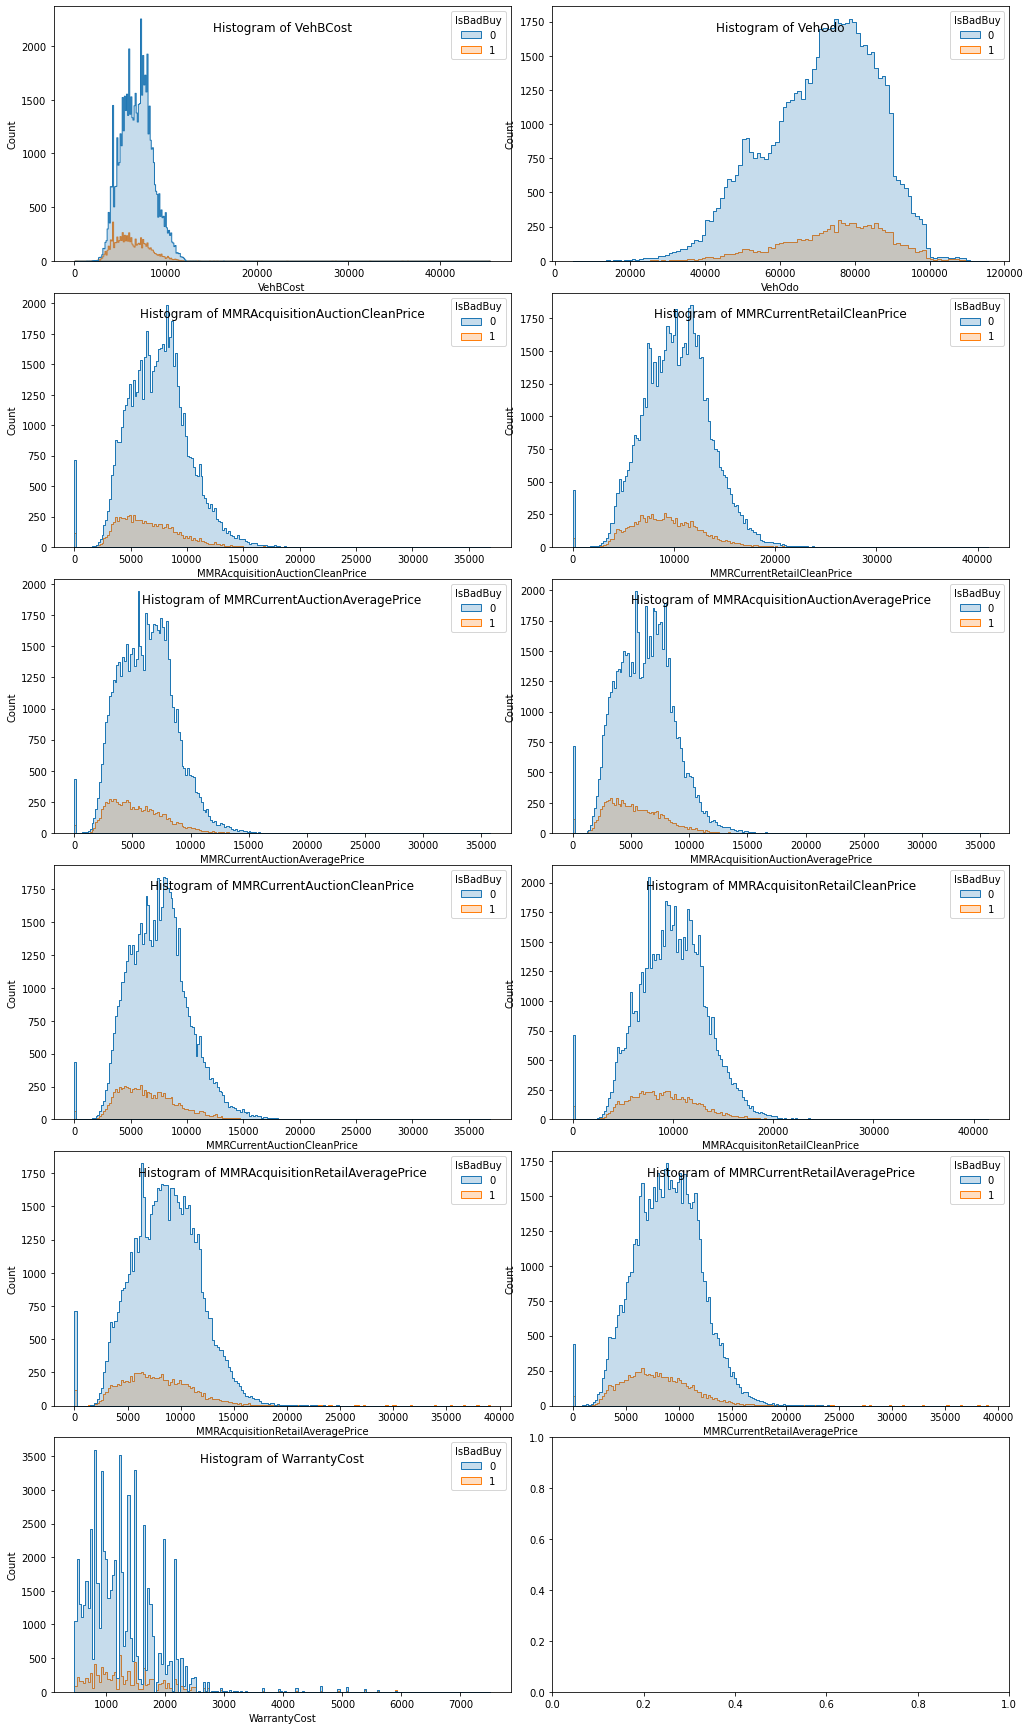

In [47]:
cols = 2
rows = math.ceil(len(new_col)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(14, 8//cols*rows))
plt.tight_layout()

for i, col in enumerate(new_col):
    ax = axes[i//cols, i%cols]
    sns.histplot(data=new_df, x=col, hue=target_col, element='step', ax=ax)
    ax.set_title(f'Histogram of {col}', y=0.88)

plt.show()

We can see that all the continuous features are nearly normally distributed.
We will use Standardization to transform our features.

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
scaler.fit(inputs_df[new_col])

StandardScaler()

In [50]:
new_df[new_col] = scaler.transform(new_df[new_col])
new_df

,VehBCost,VehOdo,MMRAcquisitionAuctionCleanPrice,MMRCurrentRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRAcquisitionAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRAcquisitonRetailCleanPrice,MMRAcquisitionRetailAveragePrice,MMRCurrentRetailAveragePrice,WarrantyCost
0,0.208767,1.203528,0.901887,0.683824,0.541750,0.822953,0.432323,1.107304,0.994519,0.912833,-0.273162
1,0.491599,1.515419,0.370753,0.799223,0.543804,0.294516,0.681743,0.803680,0.760382,0.840681,-0.373355
2,-1.035693,0.158244,-0.960023,-0.436038,-0.861383,-1.188846,-0.682623,-0.411702,-0.492365,-0.527302,0.187727
3,-1.488224,-0.403531,-1.725870,-1.397904,-1.761344,-1.720532,-1.766297,-1.228947,-1.216322,-1.423868,-1.079718
4,-1.544791,-0.146308,-0.852033,-0.674994,-1.185057,-0.900053,-1.119294,-0.337864,-0.245238,-0.658988,-0.428461
...,...,...,...,...,...,...,...,...,...,...,...
72978,-1.431658,-1.801655,-1.609065,-1.271327,-1.619223,-1.678696,-1.614039,-1.807251,-1.850617,-1.274710,-0.473548
72979,-0.300330,0.017766,-0.017865,0.455139,0.268189,0.117422,0.275970,-0.425289,-0.337752,0.444975,-0.398403
72980,0.830997,1.166076,0.949638,1.285896,0.921286,0.981362,0.897659,0.414994,0.390324,0.988545,1.029350
72981,0.152201,0.552446,0.084616,0.327051,0.188092,0.118235,0.109193,-0.336387,-0.336801,0.428150,1.164611


In [51]:
numeric_df = new_df.copy()

## Encoding Categorical Features
some of the ML algorithms does not work on categorical features.
So we use encoding techniques to transform our categorical features.

In [52]:
!pip install category_encoders 

In [53]:
discrete_features.nunique()

AUCGUART                   2
Auction                    3
BYRNO                     74
Color                     16
IsOnlineSale               2
Make                      33
Model                   1063
Nationality                4
PRIMEUNIT                  2
Size                      12
SubModel                 863
TopThreeAmericanName       4
Transmission               3
Trim                     134
VNST                      37
VehYear                   10
VehicleAge                10
WheelType                  3
WheelTypeID                4
dtype: int64

We are using One Hot Encoding technique for features have unique value less than and equal to 20.
Binary Encoding technique for features have unique value greater than 20.

In [54]:
# Creating a function to apply One Hot Encoding
def encoding_cols(dataframe, columns):
    one_hot_cols = []
    binary_cols = []
    for i in range(len(columns)):
        feat =  dataframe[columns[i]].nunique()<=20
        if feat == True:
            one_hot_cols.append(columns[i])
        else :
            binary_cols.append(columns[i])
    return one_hot_cols,binary_cols

In [55]:
discrete_cols

['AUCGUART',
 'Auction',
 'BYRNO',
 'Color',
 'IsOnlineSale',
 'Make',
 'Model',
 'Nationality',
 'PRIMEUNIT',
 'Size',
 'SubModel',
 'TopThreeAmericanName',
 'Transmission',
 'Trim',
 'VNST',
 'VehYear',
 'VehicleAge',
 'WheelType',
 'WheelTypeID']

In [56]:
#we are removing columns 'PRIMEUNIT' and '' as they have 
#more than 95% missing values
cat_cols = discrete_cols.copy()
cat_cols.remove('AUCGUART')
cat_cols.remove('PRIMEUNIT')
one_hot_cols,binary_cols = encoding_cols(discrete_feat, cat_cols)
print('Coumns having less than 20 unique values : {} \n'.format(one_hot_cols))
print('Coumns having greater than 20 unique values : {}'.format(binary_cols))


Coumns having less than 20 unique values : ['Auction', 'Color', 'IsOnlineSale', 'Nationality', 'Size', 'TopThreeAmericanName', 'Transmission', 'VehYear', 'VehicleAge', 'WheelType', 'WheelTypeID'] 

Coumns having greater than 20 unique values : ['BYRNO', 'Make', 'Model', 'SubModel', 'Trim', 'VNST']


### One Hot Encoding

In [57]:
from category_encoders import OneHotEncoder

In [58]:
one_encoder = OneHotEncoder(cols = one_hot_cols,use_cat_names=True, handle_unknown = 'ignore')

In [59]:
one_encoder.fit(discrete_feat[one_hot_cols])


OneHotEncoder(cols=['Auction', 'Color', 'IsOnlineSale', 'Nationality', 'Size',
                    'TopThreeAmericanName', 'Transmission', 'VehYear',
                    'VehicleAge', 'WheelType', 'WheelTypeID'],
              handle_unknown='ignore', use_cat_names=True)

In [60]:
one_encoded_cols = list(one_encoder.get_feature_names())
len(one_encoded_cols)

78

In [61]:
discrete_feat[one_encoded_cols] = one_encoder.transform(discrete_feat[one_hot_cols])
discrete_feat[one_encoded_cols]

,Auction_ADESA,Auction_OTHER,Auction_MANHEIM,Color_RED,Color_WHITE,Color_MAROON,Color_SILVER,Color_BLACK,Color_GOLD,Color_GREY,Color_BLUE,Color_BEIGE,Color_PURPLE,Color_ORANGE,Color_GREEN,Color_BROWN,Color_YELLOW,Color_NOT AVAIL,Color_OTHER,Color_nan,IsOnlineSale_0.0,IsOnlineSale_1.0,Nationality_OTHER ASIAN,Nationality_AMERICAN,Nationality_TOP LINE ASIAN,Nationality_OTHER,Nationality_nan,Size_MEDIUM,Size_LARGE TRUCK,Size_COMPACT,Size_LARGE,Size_VAN,Size_MEDIUM SUV,Size_LARGE SUV,Size_SPECIALTY,Size_SPORTS,Size_CROSSOVER,Size_SMALL SUV,Size_SMALL TRUCK,Size_nan,TopThreeAmericanName_OTHER,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_nan,Transmission_AUTO,Transmission_MANUAL,Transmission_nan,Transmission_Manual,VehYear_2006.0,VehYear_2004.0,VehYear_2005.0,VehYear_2007.0,VehYear_2001.0,VehYear_2003.0,VehYear_2002.0,VehYear_2008.0,VehYear_2009.0,VehYear_2010.0,VehicleAge_3.0,VehicleAge_5.0,VehicleAge_4.0,VehicleAge_2.0,VehicleAge_8.0,VehicleAge_6.0,VehicleAge_7.0,VehicleAge_9.0,VehicleAge_1.0,VehicleAge_0.0,WheelType_Alloy,WheelType_Covers,WheelType_nan,WheelType_Special,WheelTypeID_1.0,WheelTypeID_2.0,WheelTypeID_nan,WheelTypeID_3.0,WheelTypeID_0.0
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
72979,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
72980,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
72981,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


### Binary Encoding

In [62]:
from category_encoders import BinaryEncoder

In [63]:
binary_encoder = BinaryEncoder(cols = binary_cols, handle_unknown = 'ignore')

In [64]:
binary_encoder.fit(discrete_feat[binary_cols])

BinaryEncoder(cols=['BYRNO', 'Make', 'Model', 'SubModel', 'Trim', 'VNST'],
              handle_unknown='ignore')

In [65]:
binary_encoded = list(binary_encoder.get_feature_names())
len(binary_encoded)

48

In [66]:
discrete_feat[binary_encoded] = binary_encoder.transform(discrete_feat[binary_cols])
discrete_feat[binary_encoded].shape

(72983, 48)

In [67]:
discrete_feat.columns

Index(['WheelType', 'WheelTypeID', 'Trim', 'Transmission', 'Color', 'SubModel',
       'Nationality', 'TopThreeAmericanName', 'Size', 'IsOnlineSale',
       ...
       'Trim_4', 'Trim_5', 'Trim_6', 'Trim_7', 'VNST_0', 'VNST_1', 'VNST_2',
       'VNST_3', 'VNST_4', 'VNST_5'],
      dtype='object', length=143)

In [68]:
# creating new df with only encoded columns
categorical_df = discrete_feat[one_encoded_cols + binary_encoded]
categorical_df.shape

(72983, 126)

In [69]:
numeric_df.shape

(72983, 11)

In [70]:
train_df = pd.concat([categorical_df,numeric_df],axis =1, join = 'inner')
train_df

,Auction_ADESA,Auction_OTHER,Auction_MANHEIM,Color_RED,Color_WHITE,Color_MAROON,Color_SILVER,Color_BLACK,Color_GOLD,Color_GREY,Color_BLUE,Color_BEIGE,Color_PURPLE,Color_ORANGE,Color_GREEN,Color_BROWN,Color_YELLOW,Color_NOT AVAIL,Color_OTHER,Color_nan,IsOnlineSale_0.0,IsOnlineSale_1.0,Nationality_OTHER ASIAN,Nationality_AMERICAN,Nationality_TOP LINE ASIAN,Nationality_OTHER,Nationality_nan,Size_MEDIUM,Size_LARGE TRUCK,Size_COMPACT,Size_LARGE,Size_VAN,Size_MEDIUM SUV,Size_LARGE SUV,Size_SPECIALTY,Size_SPORTS,Size_CROSSOVER,Size_SMALL SUV,Size_SMALL TRUCK,Size_nan,...,Model_6,Model_7,Model_8,Model_9,Model_10,SubModel_0,SubModel_1,SubModel_2,SubModel_3,SubModel_4,SubModel_5,SubModel_6,SubModel_7,SubModel_8,SubModel_9,Trim_0,Trim_1,Trim_2,Trim_3,Trim_4,Trim_5,Trim_6,Trim_7,VNST_0,VNST_1,VNST_2,VNST_3,VNST_4,VNST_5,VehBCost,VehOdo,MMRAcquisitionAuctionCleanPrice,MMRCurrentRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRAcquisitionAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRAcquisitonRetailCleanPrice,MMRAcquisitionRetailAveragePrice,MMRCurrentRetailAveragePrice,WarrantyCost
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.208767,1.203528,0.901887,0.683824,0.541750,0.822953,0.432323,1.107304,0.994519,0.912833,-0.273162
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.491599,1.515419,0.370753,0.799223,0.543804,0.294516,0.681743,0.803680,0.760382,0.840681,-0.373355
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,-1.035693,0.158244,-0.960023,-0.436038,-0.861383,-1.188846,-0.682623,-0.411702,-0.492365,-0.527302,0.187727
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,-1.488224,-0.403531,-1.725870,-1.397904,-1.761344,-1.720532,-1.766297,-1.228947,-1.216322,-1.423868,-1.079718
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,-1.544791,-0.146308,-0.852033,-0.674994,-1.185057,-0.900053,-1.119294,-0.337864,-0.245238,-0.658988,-0.428461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1,1,1,-1.431658,-1.801655,-1.609065,-1.271327,-1.619223,-1.678696,-1.614039,-1.807251,-1.850617,-1.274710,-0.473548
72979,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,-0.300330,0.017766,-0.017865,0.455139,0.268189,0.117422,0.275970,-0.425289,-0.337752,0.444975,-0.398403
72980,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,1,1,1,0.830997,1.166076,0.949638,1.285896,0.921286,0.981362,0.897659,0.414994,0.390324,0.988545,1.029350
72981,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0.152201,0.552446,0.084616,0.327051,0.188092,0.118235,0.109193,-0.336387,-0.336801,0.428150,1.164611


# Model Building
Since we know that this is a classification problem. We have to predict that a car is bad buy or not.
so we are going to use two Machine Learning Algorithms:
1. Logistic Regression
2. Random Forest

## Training a Logistic Regression Model

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [73]:
##Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_df,target_df, test_size = 0.2, random_state = 33)

In [74]:
LR_model_1 = LogisticRegression(solver='saga', max_iter=1000)

In [75]:
LR_model_1.fit(X_train,Y_train )

LogisticRegression(max_iter=1000, solver='saga')

In [76]:
from  sklearn.model_selection import cross_val_score

In [77]:
from  sklearn.model_selection import cross_val_score
cross_val_score(LR_model_1,X_train,Y_train,cv = 5, scoring = 'accuracy').mean()

0.8961052009575019

In [78]:
LR_pred = LR_model_1.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [80]:

print("Confusion Matrix : \n{}".format(confusion_matrix(Y_test,LR_pred)))
print("Accuracy Score {}".format(accuracy_score(Y_test,LR_pred)))
print("Classification  Report : \n {}".format((classification_report(Y_test,LR_pred, labels = [1,0]))))

Confusion Matrix : 
[[12607   154]
 [ 1400   436]]
Accuracy Score 0.893539768445571
Classification  Report : 
               precision    recall  f1-score   support

           1       0.74      0.24      0.36      1836
           0       0.90      0.99      0.94     12761

    accuracy                           0.89     14597
   macro avg       0.82      0.61      0.65     14597
weighted avg       0.88      0.89      0.87     14597



## Training a Random Forest Model

In [81]:
from sklearn.ensemble import RandomForestClassifier

### Manual Hyperparameter Tuning

In [82]:
def test_params(**params):
    model = RandomForestClassifier(random_state=33, n_jobs=-1, **params).fit(X_train, Y_train)
    train_rmse = mean_squared_error(model.predict(X_train),Y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_test), Y_test, squared=False)
    return train_rmse, val_rmse

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

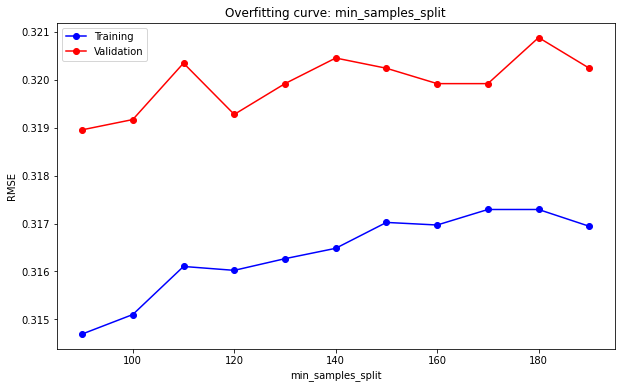

In [85]:
x = range(90,200,10)
test_param_and_plot('min_samples_split', x)

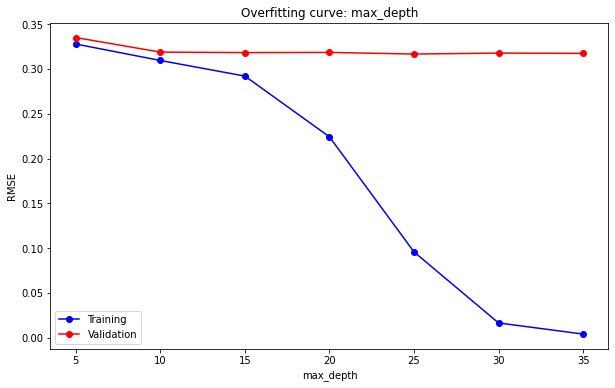

In [86]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

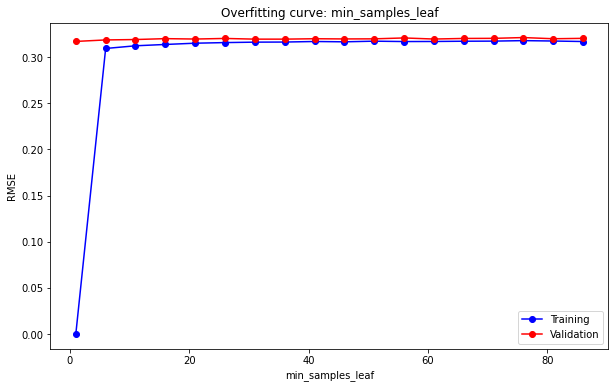

In [87]:
x = range(1,90,5)
test_param_and_plot('min_samples_leaf',x)

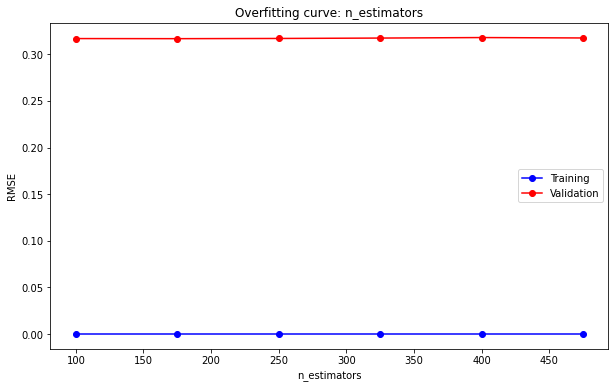

In [88]:
x = range(100,500,75)
test_param_and_plot('n_estimators',x)

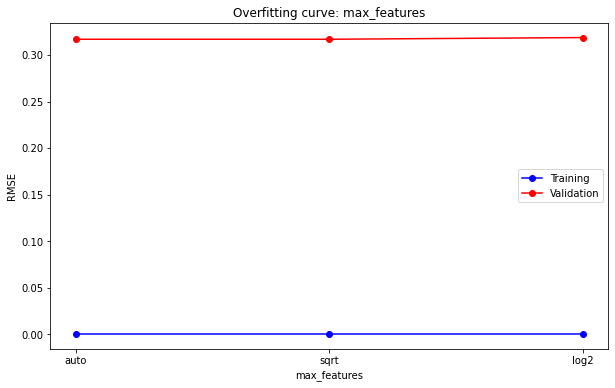

In [89]:
x = ['auto', 'sqrt', 'log2']
test_param_and_plot('max_features',x)

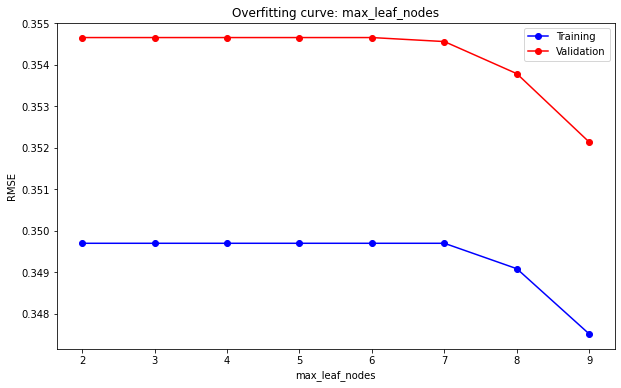

In [90]:
x = range(2,10,1)
test_param_and_plot('max_leaf_nodes',x)

In [91]:
# Create the model with custom hyperparameters
rf2 = RandomForestClassifier( n_estimators= 100,
 max_depth =  10,
 max_features = "sqrt",
 max_leaf_nodes = 6,
 min_samples_leaf = 85,
 min_samples_split= 150,
)

In [92]:
cv_score = cross_val_score(rf2, X_train, Y_train, cv = 5,scoring = 'accuracy' )

In [93]:
cv_score.mean()

0.8778645590684686

In [94]:
rf2.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', max_leaf_nodes=6,
                       min_samples_leaf=85, min_samples_split=150)

In [95]:
rf2_predict =  rf2.predict(X_test)

In [96]:

print("Confusion Matrix : \n{}".format(confusion_matrix(Y_test,rf2_predict)))
print("Accuracy Score {}".format(accuracy_score(Y_test,rf2_predict)))
print("Classification  Report : \n {}".format((classification_report(Y_test,rf2_predict, labels = [1,0]))))

Confusion Matrix : 
[[12761     0]
 [ 1830     6]]
Accuracy Score 0.8746317736521203
Classification  Report : 
               precision    recall  f1-score   support

           1       1.00      0.00      0.01      1836
           0       0.87      1.00      0.93     12761

    accuracy                           0.87     14597
   macro avg       0.94      0.50      0.47     14597
weighted avg       0.89      0.87      0.82     14597



### Randomized SearchCV

In [97]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in range(100, 250,30)]
# Number of features to consider at every split
max_features = [ 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 11,10)]
# Minimum number of samples required to split a node
min_samples_split = [2,4,6,8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 130, 160, 190, 220], 'max_features': ['sqrt', 'log2'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 11], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [98]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator = rf,param_distributions = random_grid, n_iter = 100,
                                 cv = 3, verbose = 2, random_state =33, n_jobs = -1)


In [99]:
rf_randomcv.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      11],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [100, 130, 160, 190,
                                                         220]},
                   random_state=33, verbose=2)

In [100]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prashantbharti19/used-car-quality-detection


'https://jovian.ai/prashantbharti19/used-car-quality-detection'

In [101]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 160}

In [102]:
best_random_grid=rf_randomcv.best_estimator_

In [103]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print("Confusion Matrix : \n{}".format(confusion_matrix(Y_test,y_pred)))
print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred)))
print("Classification  Report : \n {}".format((classification_report(Y_test,y_pred, labels = [1,0]))))

Confusion Matrix : 
[[12664    97]
 [ 1392   444]]
Accuracy Score 0.8979927382338837
Classification  Report : 
               precision    recall  f1-score   support

           1       0.82      0.24      0.37      1836
           0       0.90      0.99      0.94     12761

    accuracy                           0.90     14597
   macro avg       0.86      0.62      0.66     14597
weighted avg       0.89      0.90      0.87     14597



In [104]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 160}

### Grid SearchCV

In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [ rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [11], 'max_features': ['sqrt'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [4, 5, 6, 7, 8], 'n_estimators': [60, 160, 260]}


In [106]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [11],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [60, 160, 260]},
             verbose=2)

In [107]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=160)

In [108]:
best_grid=grid_search.best_estimator_

In [109]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=160)

In [110]:
y_predict =best_grid.predict(X_test)
print("Confusion Matrix : \n{}".format(confusion_matrix(Y_test,y_predict)))
print("Accuracy Score {}".format(accuracy_score(Y_test,y_predict)))
print("Classification  Report : \n {}".format((classification_report(Y_test,y_predict, labels = [1,0]))))

Confusion Matrix : 
[[12670    91]
 [ 1391   445]]
Accuracy Score 0.8984722888264712
Classification  Report : 
               precision    recall  f1-score   support

           1       0.83      0.24      0.38      1836
           0       0.90      0.99      0.94     12761

    accuracy                           0.90     14597
   macro avg       0.87      0.62      0.66     14597
weighted avg       0.89      0.90      0.87     14597



# Training Best Model
After comparing all different model's confusion matrix and classifcation report. Regression Forest with the grid search hyperparameters got the highest traning result. 

In [111]:
Model = RandomForestClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=8,
                       n_estimators=160)
Model.fit(X_train.values,Y_train.values)


RandomForestClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=8,
                       n_estimators=160)

In [112]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prashantbharti19/used-car-quality-detection


'https://jovian.ai/prashantbharti19/used-car-quality-detection'

# Datapreprocessing of Test Data

In [113]:
test_input = test_df
test_input.drop(['PurchDate','AUCGUART','PRIMEUNIT', 'VNZIP1'],axis =1)


,RefId,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,18881,GA,6500.0,0,2152
1,73016,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,18111,GA,6300.0,0,1118
2,73017,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,18111,GA,9700.0,0,1215
3,73018,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,18881,GA,4150.0,0,1933
4,73019,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,18111,GA,4100.0,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,AUTO,1.0,Alloy,88645,AMERICAN,LARGE,FORD,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,20928,FL,7955.0,0,1633
48703,121743,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,AUTO,2.0,Covers,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,20928,FL,7035.0,0,594
48704,121744,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,AUTO,2.0,Covers,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,20928,FL,6335.0,0,594
48705,121745,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,AUTO,1.0,Alloy,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,20928,FL,8055.0,0,1038


In [114]:
# Imputing nan values in discrete and continuous columns
dis_col = discrete_cols.copy()
dis_col.remove('AUCGUART')
dis_col.remove('PRIMEUNIT')
test_dis = test_input[dis_col].copy()

#Impute the mode values in place of NaN in discrete columns
test_cat_fillna = np.squeeze(test_dis.mode())
cat_clean = test_df[dis_col].fillna(test_cat_fillna)

# Imputing the mean value in place of NaN in continuous
conti_cols = continuous_cols.copy()
conti_cols.remove('VNZIP1')
fill_na = test_input[conti_cols].mean()
conti_clean = test_input[conti_cols].fillna(fill_na)


In [115]:
# Scaling continuous test data
conti_clean[conti_cols]= scaler.transform(conti_clean)
conti_clean

,VehBCost,VehOdo,MMRAcquisitionAuctionCleanPrice,MMRCurrentRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRAcquisitionAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRAcquisitonRetailCleanPrice,MMRAcquisitionRetailAveragePrice,MMRCurrentRetailAveragePrice,WarrantyCost
0,-0.130631,0.951861,-0.362772,-0.118839,-0.504028,-0.445540,-0.450327,-0.724778,-0.811730,-0.070769,1.461851
1,-0.243764,-0.660342,-0.620258,-0.256594,-0.610824,-0.660814,-0.625666,-0.948361,-0.993274,-0.392704,-0.264812
2,1.679493,-0.152070,2.081697,1.923314,1.951456,1.671459,1.777702,1.397932,0.971708,2.123893,-0.102833
3,-1.459941,1.124166,-1.407410,-1.132061,-1.316087,-1.450424,-1.408547,-1.632106,-1.658301,-0.987071,1.096146
4,-1.488224,0.132521,-0.378566,-0.844468,-0.459666,-0.453258,-0.390019,-0.738659,-0.818384,-0.925920,-0.595450
...,...,...,...,...,...,...,...,...,...,...,...
48702,0.692410,1.176022,-0.197481,0.377501,-0.152423,-0.313126,-0.158468,0.311324,0.155236,0.319760,0.595180
48703,0.171999,0.710758,0.227133,0.428857,0.297352,0.292485,0.294955,0.640940,0.792699,0.487684,-1.139834
48704,-0.223966,0.751159,-0.631277,-0.197988,-0.533602,-0.595826,-0.571314,-0.053438,-0.166347,-0.292726,-1.139834
48705,0.748976,0.292205,0.291046,-0.062952,-0.427217,-0.071450,-0.200162,0.619674,0.202761,-0.064621,-0.398403


In [116]:

print(inputs_df[one_hot_cols + binary_cols].nunique())
test_df[one_hot_cols + binary_cols].nunique()


Auction                    3
Color                     16
IsOnlineSale               2
Nationality                4
Size                      12
TopThreeAmericanName       4
Transmission               3
VehYear                   10
VehicleAge                10
WheelType                  3
WheelTypeID                4
BYRNO                     74
Make                      33
Model                   1063
SubModel                 863
Trim                     134
VNST                      37
dtype: int64


Auction                   3
Color                    17
IsOnlineSale              2
Nationality               4
Size                     12
TopThreeAmericanName      4
Transmission              2
VehYear                  10
VehicleAge               10
WheelType                 3
WheelTypeID               3
BYRNO                    75
Make                     30
Model                   966
SubModel                755
Trim                    128
VNST                     32
dtype: int64

In [117]:
#Encoding categorical test data using 
onehotcol = list(one_encoder.get_feature_names())
cat_clean[onehotcol] = one_encoder.transform(cat_clean[one_hot_cols])

# Binary Encoding
bin_encoded = list(binary_encoder.get_feature_names())
cat_clean[bin_encoded] = binary_encoder.transform(cat_clean[binary_cols])

cat_encoded = cat_clean[onehotcol+bin_encoded]
cat_encoded

,Auction_ADESA,Auction_OTHER,Auction_MANHEIM,Color_RED,Color_WHITE,Color_MAROON,Color_SILVER,Color_BLACK,Color_GOLD,Color_GREY,Color_BLUE,Color_BEIGE,Color_PURPLE,Color_ORANGE,Color_GREEN,Color_BROWN,Color_YELLOW,Color_NOT AVAIL,Color_OTHER,Color_nan,IsOnlineSale_0.0,IsOnlineSale_1.0,Nationality_OTHER ASIAN,Nationality_AMERICAN,Nationality_TOP LINE ASIAN,Nationality_OTHER,Nationality_nan,Size_MEDIUM,Size_LARGE TRUCK,Size_COMPACT,Size_LARGE,Size_VAN,Size_MEDIUM SUV,Size_LARGE SUV,Size_SPECIALTY,Size_SPORTS,Size_CROSSOVER,Size_SMALL SUV,Size_SMALL TRUCK,Size_nan,...,Make_1,Make_2,Make_3,Make_4,Make_5,Model_0,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,Model_10,SubModel_0,SubModel_1,SubModel_2,SubModel_3,SubModel_4,SubModel_5,SubModel_6,SubModel_7,SubModel_8,SubModel_9,Trim_0,Trim_1,Trim_2,Trim_3,Trim_4,Trim_5,Trim_6,Trim_7,VNST_0,VNST_1,VNST_2,VNST_3,VNST_4,VNST_5
0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48703,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48704,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48705,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [118]:
Test_df = pd.concat([conti_clean, cat_encoded], axis=1, join = 'inner')


In [119]:
Test_df = np.nan_to_num(Test_df) # It will convert infinity values to finite number coz Model.predict was throwing error

Predictions = Model.predict(Test_df)
Predictions

array([0, 0, 0, ..., 0, 0, 0])

In [120]:
submission_df = pd.read_csv('DontGetKicked/example_entry.csv')

In [121]:
submission_df


,RefId,IsBadBuy
0,73015,0
1,73016,0
2,73017,0
3,73018,0
4,73019,0
...,...,...
48702,121742,0
48703,121743,0
48704,121744,0
48705,121745,0


In [122]:
submission_df['IsBadBuy'] = Predictions

In [123]:
submission_df.to_csv('submission.csv',index = False)

In [124]:
!kaggle competitions submit -c DontGetKicked -f submission.csv -m "Submitted by Dr.Doom101"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [125]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prashantbharti19/used-car-quality-detection


'https://jovian.ai/prashantbharti19/used-car-quality-detection'

# Making Predictions on Single Input
We are going to predict the output on single input.

In [126]:
def predict_input(model, single_input):
  input_df = pd.DataFrame([single_input])
  input_df[discrete_cols].fillna(input_df[discrete_cols].mode())
  input_df[continuous_cols].fillna(input_df[continuous_cols].mean())
  input_df.drop(['RefId','PurchDate', 'AUCGUART','PRIMEUNIT','VNZIP1'],axis =1, inplace = True)
  input_df[binary_encoded] = binary_encoder.transform(input_df[binary_cols])
  input_df[one_encoded_cols] = one_encoder.transform(input_df[one_hot_cols])
  input_df[new_col] = scaler.transform(input_df[new_col])
  df = input_df[binary_encoded+one_encoded_cols+new_col]
  pre = model.predict(df.values)
   
  return pre

In [127]:
single_input = { 'RefId' : 50, 'PurchDate' :'12/7/2009', 'Auction': np.nan ,'VehYear' : 2004,'VehicleAge': 6,'Make' : "FORD",'Model' : 'FOCUS',
                'Trim' : 'ZX3','SubModel' : '2D COUPE ZX3','Color' : 'SILVER',
                   'Transmission' : 'MANUAL','WheelTypeID' : 2.0,'WheelType' : 'Covers','VehOdo' : 69367,
                'Nationality' : 'AMERICAN','Size' : 'COMPACT','TopThreeAmericanName' : 'FORD','MMRAcquisitionAuctionAveragePrice' : 3913.0,
                'MMRAcquisitionAuctionCleanPrice' : 5054.0,'MMRAcquisitionRetailAveragePrice': 7723.0,'MMRAcquisitonRetailCleanPrice':8707.0 ,
                'MMRCurrentAuctionAveragePrice' : 3247.0,'MMRCurrentAuctionCleanPrice' : 4384.0,'MMRCurrentRetailAveragePrice' : 6739.0,
                'MMRCurrentRetailCleanPrice' :7911.0, 'PRIMEUNIT' :np.nan ,'AUCGUART': np.nan,'BYRNO' : 19638,'VNZIP1' : 33619,'VNST' : 'FL',
                'VehBCost':4000.0,'IsOnlineSale' : 0,'WarrantyCost' : 1389
}

In [128]:
prediction = predict_input(Model, single_input)
if prediction == 0:
  print(" The car is Good Buy")
else :
  print('The car is Bad Buy')

 The car is Good Buy
